In [462]:
import pandas as pd
df=pd.read_csv('D:\\data\\Bengaluru_House_Data.csv')
df.head()
df.dropna()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [463]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [464]:
df['bedroom']=df['size'].str.split(' ').str[0] # here the output will be string

df['bedroom']=pd.to_numeric(df['bedroom'])
df['balcony']=df['balcony'].fillna(df['balcony'].median())
df['balcony'].unique()

array([1., 3., 2., 0.])

In [465]:
df=df.drop(['area_type','size','location','availability','society'],axis='columns')

In [466]:
import numpy as np



#df['bedroom']=df['size'].apply(lambda x: int(x.split(' ')[0]))
df.sample(5)

#df['price']=df['price'].astype(str)
#df.astype({'price':'str','total_sqft':'str'})
#df1.head()

df=df[df['bedroom']<20]
df=df[df['bedroom']>1]
df.head()
df.shape

(12646, 5)

In [467]:
def is_float(x):
    try:
        float(x)
    except:   
        return False
    return True

In [468]:
df[~df['total_sqft'].apply(is_float)]

,total_sqft,bath,balcony,price,bedroom
30,2100 - 2850,4.0,0.0,186.000,4.0
56,3010 - 3410,NaN,2.0,192.000,4.0
81,2957 - 3450,NaN,2.0,224.500,4.0
122,3067 - 8156,4.0,0.0,477.000,4.0
137,1042 - 1105,2.0,0.0,54.005,2.0
...,...,...,...,...,...
12975,850 - 1060,2.0,0.0,38.190,2.0
12990,1804 - 2273,3.0,0.0,122.000,3.0
13059,1200 - 1470,2.0,0.0,72.760,2.0
13265,1133 - 1384,2.0,0.0,59.135,2.0


In [469]:
df.head()

,total_sqft,bath,balcony,price,bedroom
0,1056,2.0,1.0,39.07,2.0
1,2600,5.0,3.0,120.00,4.0
2,1440,2.0,3.0,62.00,3.0
3,1521,3.0,1.0,95.00,3.0
4,1200,2.0,1.0,51.00,2.0


In [470]:
def to_avgnum(x):
    num=x.split('-')
    
    if len(num) == 2:
        avg=(float(num[0])+float(num[1]))/2
        return avg
    try:
        return float(x)
    except:
        return None

In [471]:
k=to_avgnum('300Sq. Yards')
k

In [472]:
df1=df.copy()
df1['total_sqft']=df1['total_sqft'].apply(to_avgnum)
df1.head()


,total_sqft,bath,balcony,price,bedroom
0,1056.0,2.0,1.0,39.07,2.0
1,2600.0,5.0,3.0,120.00,4.0
2,1440.0,2.0,3.0,62.00,3.0
3,1521.0,3.0,1.0,95.00,3.0
4,1200.0,2.0,1.0,51.00,2.0


In [473]:
df2=df1.copy()

df2=df2[df2['total_sqft']/df2['bedroom']<300]
df2

,total_sqft,bath,balcony,price,bedroom
9,1020.0,6.0,2.0,370.0,6.0
45,600.0,9.0,2.0,200.0,8.0
58,1407.0,4.0,1.0,150.0,6.0
68,1350.0,7.0,0.0,85.0,8.0
70,500.0,3.0,2.0,100.0,3.0
...,...,...,...,...,...
13277,1400.0,7.0,2.0,218.0,7.0
13279,1200.0,5.0,2.0,130.0,6.0
13281,1375.0,5.0,1.0,125.0,5.0
13303,774.0,5.0,3.0,70.0,5.0


In [474]:
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_x=sx.fit_transform(df2.drop('price',axis='columns'))
scaled_x

array([[0.39207387, 0.29411765, 0.66666667, 0.23529412],
       [0.23047326, 0.47058824, 0.66666667, 0.35294118],
       [0.5409773 , 0.17647059, 0.33333333, 0.23529412],
       ...,
       [0.52866487, 0.23529412, 0.33333333, 0.17647059],
       [0.29742209, 0.23529412, 1.        , 0.17647059],
       [0.57676029, 0.47058824, 0.66666667, 0.29411765]])

In [475]:
df2.price.values

array([370.  , 200.  , 150.  ,  85.  , 100.  ,  22.  , 160.  ,  23.  ,
       115.  , 185.  ,  99.  ,  85.  , 250.  , 170.  , 250.  , 140.  ,
       180.  ,  74.  , 120.  ,  62.  , 250.  ,  85.  , 250.  , 260.  ,
       180.  ,  65.  , 190.  ,  58.  ,  90.  , 145.  , 150.  , 150.  ,
       100.  , 160.  , 160.  , 190.  ,  76.  ,  65.  , 300.  ,  59.  ,
        15.  ,  69.  ,  72.  , 125.  ,  80.  , 290.  , 155.  ,  72.  ,
        95.  , 225.  ,  90.  ,  65.  , 240.  , 130.  , 170.  ,  54.9 ,
        90.  , 165.  , 145.  , 140.  , 150.  , 165.  , 125.  , 105.  ,
       210.  ,  60.  ,  16.  , 250.  , 195.  , 180.  , 135.  , 235.  ,
        95.  ,  75.  ,  90.  ,  50.  , 150.  , 195.  ,  75.  , 200.  ,
        88.  , 360.  ,  75.  ,  60.  , 120.  , 135.  , 135.  ,  90.  ,
       200.  , 170.  ,  66.  ,  26.  , 475.  ,  67.5 , 285.  , 200.  ,
        72.5 , 100.  , 130.  ,  60.  , 130.  , 106.  , 120.  , 135.  ,
       100.  , 110.  , 120.  ,  80.  , 250.  ,  70.  ,  15.  ,  70.  ,
      

In [476]:
df2.price.values.reshape(df2.shape[0],1)

array([[370.  ],
       [200.  ],
       [150.  ],
       [ 85.  ],
       [100.  ],
       [ 22.  ],
       [160.  ],
       [ 23.  ],
       [115.  ],
       [185.  ],
       [ 99.  ],
       [ 85.  ],
       [250.  ],
       [170.  ],
       [250.  ],
       [140.  ],
       [180.  ],
       [ 74.  ],
       [120.  ],
       [ 62.  ],
       [250.  ],
       [ 85.  ],
       [250.  ],
       [260.  ],
       [180.  ],
       [ 65.  ],
       [190.  ],
       [ 58.  ],
       [ 90.  ],
       [145.  ],
       [150.  ],
       [150.  ],
       [100.  ],
       [160.  ],
       [160.  ],
       [190.  ],
       [ 76.  ],
       [ 65.  ],
       [300.  ],
       [ 59.  ],
       [ 15.  ],
       [ 69.  ],
       [ 72.  ],
       [125.  ],
       [ 80.  ],
       [290.  ],
       [155.  ],
       [ 72.  ],
       [ 95.  ],
       [225.  ],
       [ 90.  ],
       [ 65.  ],
       [240.  ],
       [130.  ],
       [170.  ],
       [ 54.9 ],
       [ 90.  ],
       [165.  ],
       [145.  

In [477]:
scaled_y=sy.fit_transform(df2.price.values.reshape(df2.shape[0],1))
scaled_y

array([[0.53787879],
       [0.28030303],
       [0.20454545],
       [0.10606061],
       [0.12878788],
       [0.01060606],
       [0.21969697],
       [0.01212121],
       [0.15151515],
       [0.25757576],
       [0.12727273],
       [0.10606061],
       [0.35606061],
       [0.23484848],
       [0.35606061],
       [0.18939394],
       [0.25      ],
       [0.08939394],
       [0.15909091],
       [0.07121212],
       [0.35606061],
       [0.10606061],
       [0.35606061],
       [0.37121212],
       [0.25      ],
       [0.07575758],
       [0.26515152],
       [0.06515152],
       [0.11363636],
       [0.1969697 ],
       [0.20454545],
       [0.20454545],
       [0.12878788],
       [0.21969697],
       [0.21969697],
       [0.26515152],
       [0.09242424],
       [0.07575758],
       [0.43181818],
       [0.06666667],
       [0.        ],
       [0.08181818],
       [0.08636364],
       [0.16666667],
       [0.09848485],
       [0.41666667],
       [0.21212121],
       [0.086

In [478]:
w=np.ones(shape=4)
w

array([1., 1., 1., 1.])

In [479]:
scaled_x.T

array([[0.39207387, 0.23047326, 0.5409773 , ..., 0.52866487, 0.29742209,
        0.57676029],
       [0.29411765, 0.47058824, 0.17647059, ..., 0.23529412, 0.23529412,
        0.47058824],
       [0.66666667, 0.66666667, 0.33333333, ..., 0.33333333, 1.        ,
        0.66666667],
       [0.23529412, 0.35294118, 0.23529412, ..., 0.17647059, 0.17647059,
        0.29411765]])

In [480]:
np.dot(w,scaled_x.T)

array([1.58815231, 1.72066934, 1.28607534, 1.22492814, 1.03513418,
       0.17660639, 1.80220899, 1.22345699, 1.01219926, 1.53471546,
       1.02921938, 1.19125757, 1.67258146, 1.53976265, 1.08693389,
       0.84801092, 1.53976265, 0.84698489, 1.28855744, 0.54456842,
       2.04956658, 2.06004572, 1.89270383, 1.40287743, 1.72659168,
       1.15278124, 1.53976265, 1.07361051, 1.21434337, 1.02921938,
       1.38090065, 1.77505677, 0.87309599, 1.48478676, 1.07065312,
       2.1128262 , 1.60080423, 1.64223796, 1.7406544 , 0.82795796,
       0.17660639, 1.24712371, 1.09321836, 1.53976265, 1.30668658,
       2.15108375, 0.98378713, 1.22973391, 0.46576738, 1.53976265,
       1.08160001, 1.13243404, 1.8338803 , 1.38068186, 1.95374541,
       0.9791247 , 1.34627194, 2.01792545, 2.19525609, 1.71623324,
       0.91081034, 2.04956658, 1.65740971, 1.95448476, 2.04143373,
       1.2500811 , 0.54456842, 1.65740971, 1.69536549, 1.99074305,
       1.2053203 , 1.16721363, 1.16980136, 0.73916816, 0.69884

In [481]:
scaled_y.reshape(scaled_y.shape[0],)

array([0.53787879, 0.28030303, 0.20454545, 0.10606061, 0.12878788,
       0.01060606, 0.21969697, 0.01212121, 0.15151515, 0.25757576,
       0.12727273, 0.10606061, 0.35606061, 0.23484848, 0.35606061,
       0.18939394, 0.25      , 0.08939394, 0.15909091, 0.07121212,
       0.35606061, 0.10606061, 0.35606061, 0.37121212, 0.25      ,
       0.07575758, 0.26515152, 0.06515152, 0.11363636, 0.1969697 ,
       0.20454545, 0.20454545, 0.12878788, 0.21969697, 0.21969697,
       0.26515152, 0.09242424, 0.07575758, 0.43181818, 0.06666667,
       0.        , 0.08181818, 0.08636364, 0.16666667, 0.09848485,
       0.41666667, 0.21212121, 0.08636364, 0.12121212, 0.31818182,
       0.11363636, 0.07575758, 0.34090909, 0.17424242, 0.23484848,
       0.06045455, 0.11363636, 0.22727273, 0.1969697 , 0.18939394,
       0.20454545, 0.22727273, 0.16666667, 0.13636364, 0.29545455,
       0.06818182, 0.00151515, 0.35606061, 0.27272727, 0.25      ,
       0.18181818, 0.33333333, 0.12121212, 0.09090909, 0.11363

# batch_gradient_descent

In [482]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.62831425, 0.62850619, 0.25745704, 0.66389454]),
 -0.4866553403030078,
 0.039859975585203905)

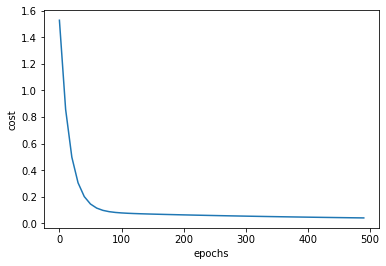

In [483]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('epochs')
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [490]:
def predict(area,bath,bedroom,balcony,w,b):
    scaled_x=sx.transform([[area,bath,bedroom,balcony]])[0]
    #print(sx.transform([[area,bedroom]])[0][0])
    scaled_price=w[0]*scaled_x[0]+w[1]*scaled_x[1] +b
    return sy.inverse_transform([[scaled_price]])[0][0]
    
predict(1056,2,2,0,w,b)

    

-113.4595641326597

In [498]:
predict(1020,2,6,1,w,b)

-119.20359897141812

# stochastic gradient descent

In [499]:
import random
random.randint(0,6)

2

In [500]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 1):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index=random.randint(0,total_samples-1)
        sample_x=X[random_index]
        sample_y=y_true[random_index]
        y_predicted=np.dot(w,sample_x.T)+b
        w_grad=-(2/total_samples)*sample_x.T.dot(sample_y-y_predicted)
        b_grad= -(2/total_samples)*(sample_y-y_predicted)
        
        w=w-learning_rate* w_grad
        b=b-learning_rate*b_grad
        cost=np.square(sample_y-y_predicted)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b, cost,cost_list,epoch_list

        
w_grd,b_grad,cost_grad,grad_cost_list,grad_epoch_list= batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 100000)
w_grd,b_grad,cost_grad        

(array([0.41849643, 0.09997284, 0.03916773, 0.12715811]),
 -0.0458469600377074,
 0.0006619423618481532)

In [501]:
w,b,cost

(array([0.62831425, 0.62850619, 0.25745704, 0.66389454]),
 -0.4866553403030078,
 0.039859975585203905)

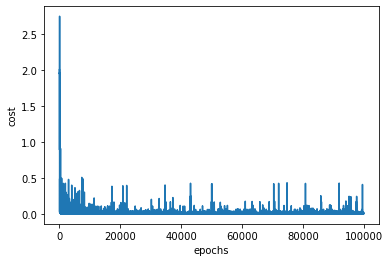

In [502]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('epochs')
plt.ylabel("cost")
plt.plot(grad_epoch_list,grad_cost_list)

In [503]:
predict(1020,2,6,1,w_grd,b_grad)

96.91610662872306

In [497]:
predict(1056,2,2,1,w_grd,b_grad)

101.87789549100025